### How to access DOORS cubes based on model data by Hereon

This notebook serves to explain how to access data cubes that have been created based on model data provided by Hereon for the Black Sea region. The cubes are accessed using the xcube package. To access the data, the first step is to set up a store that establishes the connection to the s3 bucket hosting the data.

In [1]:
from xcube.core.store import new_data_store

In [2]:
hereon_model_store = new_data_store(
    "s3",
    root="doors-cubes/model-data/Hereon",
    max_depth=1
)

Next, we can list the data cubes that are stored in this bucket. 

In [3]:
list(hereon_model_store.get_data_ids())

['Hereon--WAVES-BSeas4-BS-b20230123_re-sv08.00.levels']

We can get a description of the data and open the dataset.

In [4]:
hereon_model_store.describe_data('Hereon--WAVES-BSeas4-BS-b20230123_re-sv08.00.levels')

In [5]:
ds = hereon_model_store.open_data('Hereon--WAVES-BSeas4-BS-b20230123_re-sv08.00.levels')
ds

For purposes of better visualisation, the data is provided as a MultiLevelDataset. We may access the underlying dataset like this:

In [6]:
display(ds.base_dataset)

<xarray.Dataset>
Dimensions:  (time: 720, lat: 713, lon: 482)
Coordinates:
  * lat      (lat) float32 40.87 40.88 40.89 40.9 40.9 ... 46.78 46.79 46.8 46.8
  * lon      (lon) float32 27.41 27.42 27.43 27.44 ... 31.4 31.4 31.41 31.42
  * time     (time) datetime64[ns] 2021-11-01 ... 2021-11-30T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
    VMDR     (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
    VSDX     (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
    VSDY     (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
    VTM02    (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
    VTPK     (time, lat, lon) float32 dask.array<chunksize=(6, 179, 241), meta=np.ndarray>
Attributes: (12/29)
    NCO:                     netCDF Operators version 4.7.5 (Homepage = http:...
    acknowledgment:          DOORS project
    bulletim_type:           reanalysis
    bulletin_date:           20230123
    comment:                 Please check in CMEMS catalogue the INFO section...
    contact:                 servicedesk.cmems@mercator-ocean.eu
    ...                      ...
    references:              Please check in CMEMS catalogue the INFO section...
    source:                  WAM Cycle 6
    time_coverage_end:       2021-11-30T23:00:00
    time_coverage_start:     2021-11-01T00:00:00
    time_period:             1H
    title:                   Wave Products (2D) - Instantaneous Field

We can then visualise a single image ...

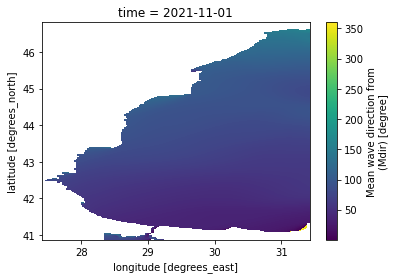

In [7]:
ds.base_dataset.VMDR.isel(time=0).plot()

... or a time series.

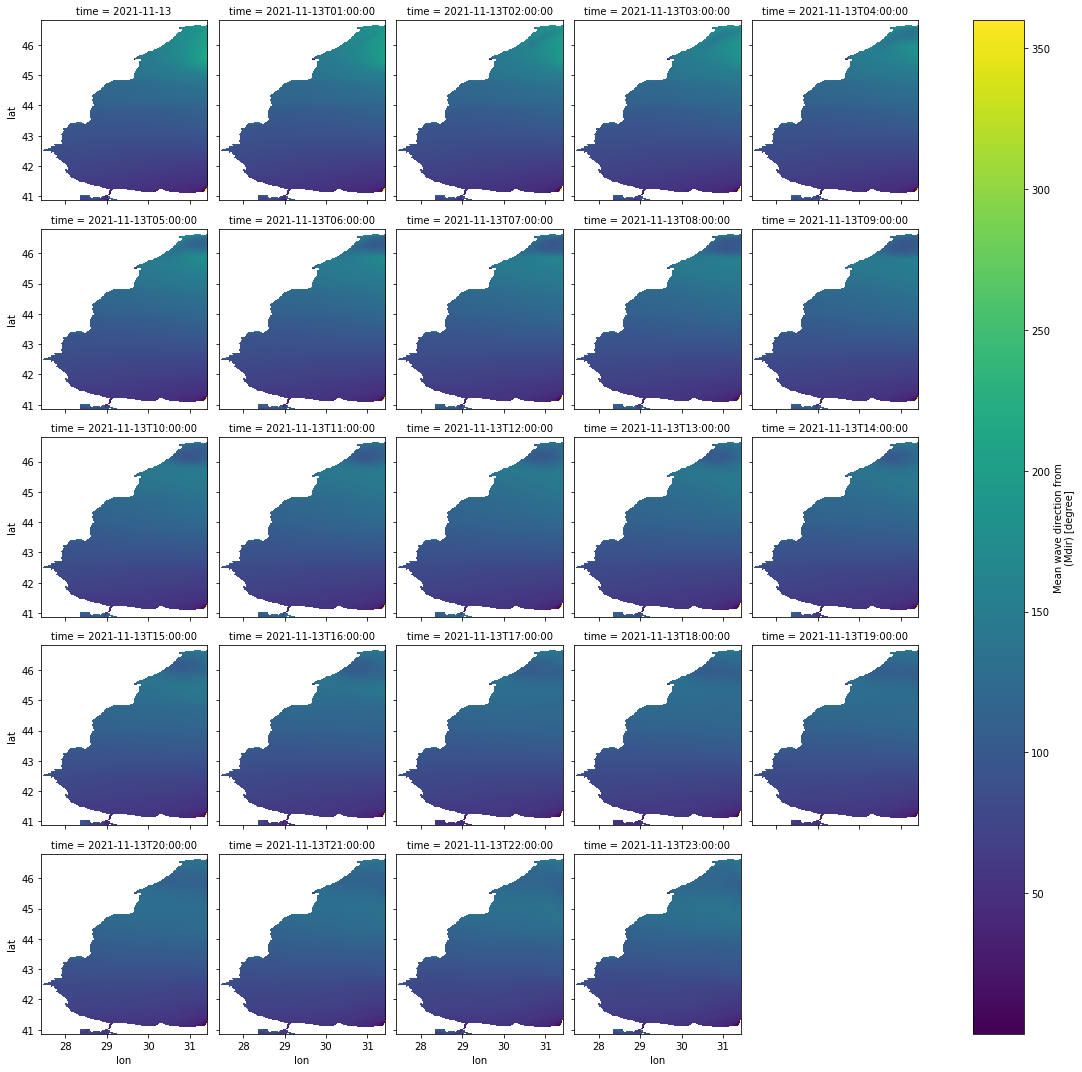

In [8]:
ds.base_dataset.VMDR.sel({'time': slice('2021-11-13', '2021-11-13')}).plot.imshow(col='time', col_wrap=5)